# <center><font color=blue><code style="background:blue;color:white;edges:round">**IBM Employee Attrition Analysis**</code> 
    
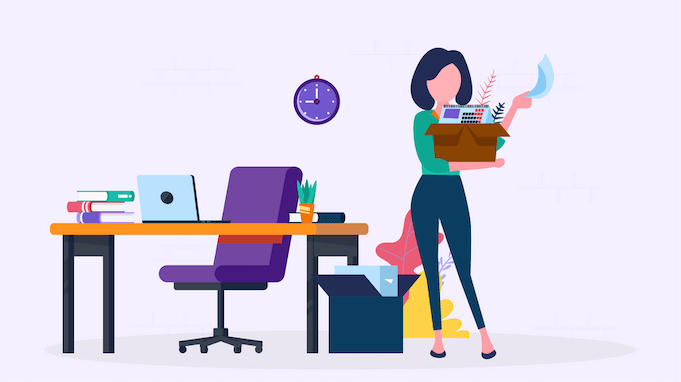



## **Notebook Content**
   
* IBM Employee Attrition Analysis
* Table of Content
* 1. Overview
    * 1.1 Introduction
    * 1.2 Data Description
    * 1.3 Purpose of Analysis
* 2. Preparation
    * 2.1 Import Libraries
    * 2.2 Data Wrangling
        * 2.2.1 Data Gathering
        * 2.2.2 Data Assessing
        * 2.2.3 Data Cleaning
* 3. Exploratory Data Analysis
* 4. Conclusion
   

## 1. Overview

#### 1.1 Introduction
Employee attrition is a gradual reduction in employee numbers, When an employee moves out of the company voluntarily or involuntarily. It happens when the size of a workforce diminishes over time. Which means that employees are leaving faster than they are hired. Employee attrition analysis is specifically focused on identifying employees voluntarily leaving the company.

IBM(International Business Machines Corporation) is an American Multinational Technology company, launched in 1911 headquarted in US with operations in over 170 countries. IBM manufactures and markets computer hardware, middleware and softwares.They provide hosting and consulting services in areas ranging from mainframe computers to nanotechnology.  

#### 1.2 Data Description

IBM Employee Attrition is a dataset of approximately 35 features like Age, Distance From Home, Daily Rate, Monthly Income, Stock Level, Education, Business Travel etc. The variables are numeric and non-numeric in nature few are ordered factor variables with their different levels. There sure is a lot of information to explore from the dataset.


####  1.3 Purpose of Analysis

The purpose of my exploration is mostly to go in-depth and figure out the factors responsible for employee attrition.
In the course of this analysis, answers will be provided to the following questions:

1. What do you think are the 3 factors behind employee attrition?
2. What is the relationship between education and monthly income?
3. What is the effect of age on attrition?
4. Is income the main factor in employee attrition?
5. How does work-life balance impact the overall attrition rate?


## 2. Preparation

#### 2.1 Import Libraries

In [26]:
#import necessary libraries
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#### 2.2 Data Wrangling

##### 2.2.1 Data Gathering

In [27]:
# connect to database
conn = sqlite3.connect('attr_data.db')

# load data
df = pd.read_sql_query("SELECT * FROM attrition_records", conn)


##### 2.2.2 Data Assessing

In [28]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [29]:
# examine the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

###### Observation: 
<div class="alert alert-info">There are no missing features in the data. The data comprises of both qualitative and quantitative data of 1470 samples and 36 features. 
Few samples require cleaning, Id column should be converted to a string
Some features have an object data type , which should be categorical.</div>

In [30]:
# quick summary of the variables
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


###### Observation:
<div class="alert alert-info"> 
    
- The mean age is 36 years, there are young employees of age 18 (trainees/interns) and old people of age 60 (people with many years of experience).
- There are people who live very close to work almost next door, and others are almost an hr drive .
- Average hourly rate is 66 USD 
- Average Monthly rate  is 6500 usd, lowest earners reach 1000 usd(young employees) and highest earner earn 20000 usd (probably older employees).</div>

##### 2.2.3 Data Cleaning

In [31]:
#making a copy of our data
employeeData = df.copy()

#verifying changes
assert len(employeeData.columns) == len(df.columns)

In [32]:
# converting all object type to a catgorical data type

for col in employeeData.columns:
    if employeeData[col].dtype == 'object':
        employeeData[col] = employeeData[col].astype('category')

In [33]:
#changing attrition column to numerical

employeeData['Attrition'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [34]:
#improper data type
#converting id to an object type and renaming it to 'ID' to make the column names consistent

employeeData['id'] =  employeeData['id'].astype(str)
employeeData.rename(columns = {'id' : 'Id'}, inplace=True)

In [35]:
# drop irrelevant columns

employeeData.drop(['EmployeeCount', 'EmployeeNumber','StandardHours', 'Over18'], axis=1, inplace=True)

In [36]:
employeeData.head()

,Id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


## 3. Exploratory Data Analysis

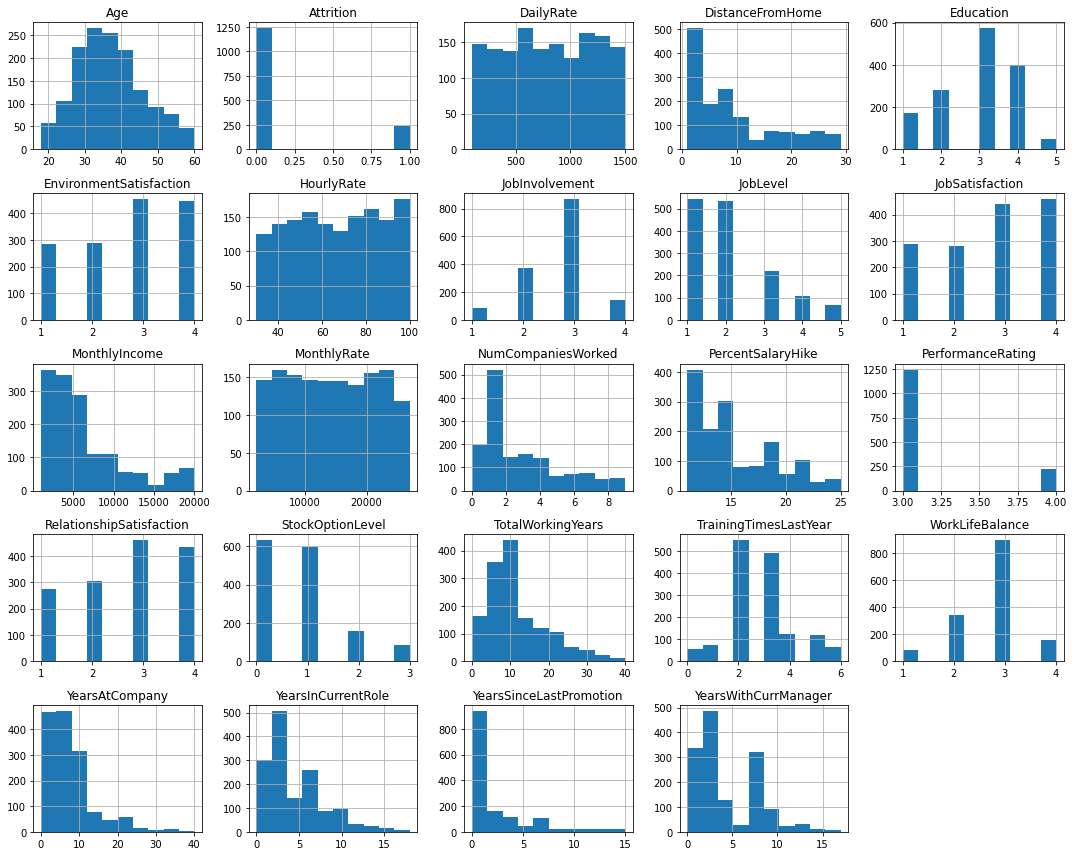

In [37]:
# quick visualization

employeeData.hist(figsize=(15,12))
plt.tight_layout();

###### Observation:
From the histogram charts we can infer that:
- The age distributions is slightly skewed to the right, and most of the employees are between 30-40 year old.
- Most of the other distributions are skewed to the right, Distance From Home, Monthly Income, Number Companies Worked, Total Working Years, Years At Company, Years Since Last Promotion.

### Question 1 : What are the 3 factors behind employee attrition?

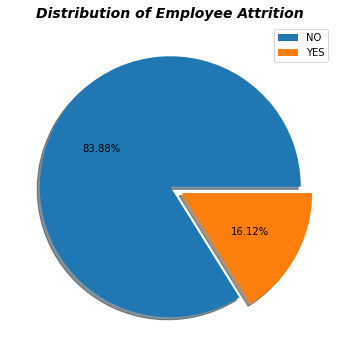

In [38]:
# Firstly, we need to know the attrition rate of the company
# Visualization
# Pie chart showing attrition rate 

fig = plt.figure(figsize = (15,6))
attr_freq = employeeData.Attrition.value_counts()
plt.pie(attr_freq, autopct='%0.2f%%', explode = [0, 0.1], shadow= True)
plt.legend(labels = ['NO', 'YES'])
plt.title('Distribution of Employee Attrition', fontsize=14, fontweight="bold", fontstyle="oblique");

###### Observation:
From the pie chart we can infer that out of a total of 1470 employees. About 16% left their job due to some reasons and the other 84% prefer to keep working at the company. Which leaves us with an attrition rate of 16.12%.

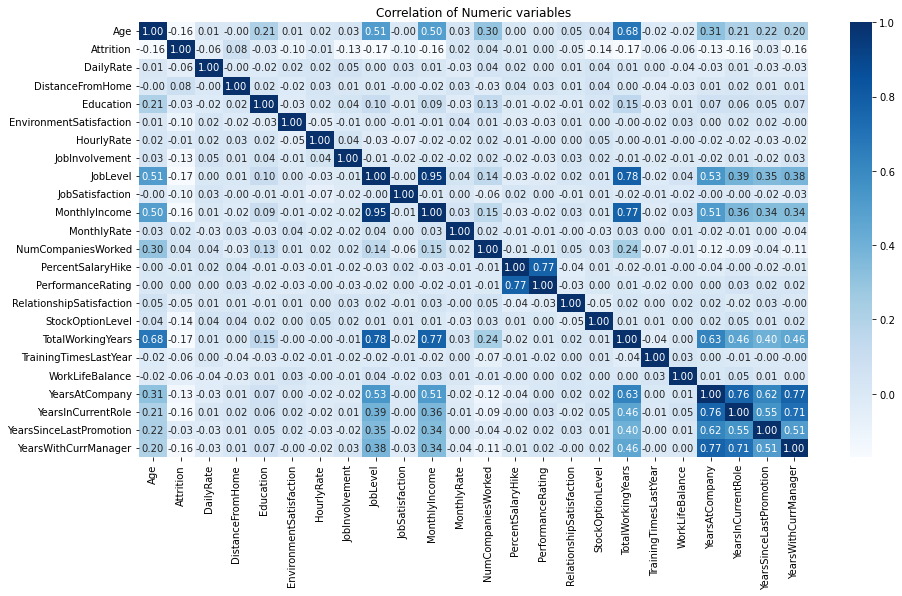

In [39]:
#visualize the correlation btwn the numeric variales in a heat map
plt.figure(figsize=(15, 8))
sns.heatmap(data=employeeData.corr(), fmt='.2f', annot = True, cmap = 'Blues')
plt.xticks(rotation=90)
plt.title('Correlation of Numeric variables');

###### Observation:

All the variables are weakly correlated with attrition but Age, Job level, Monthly Income, Total Working Years, Years in Current Role are the top 5 most negatively weakly correlated.

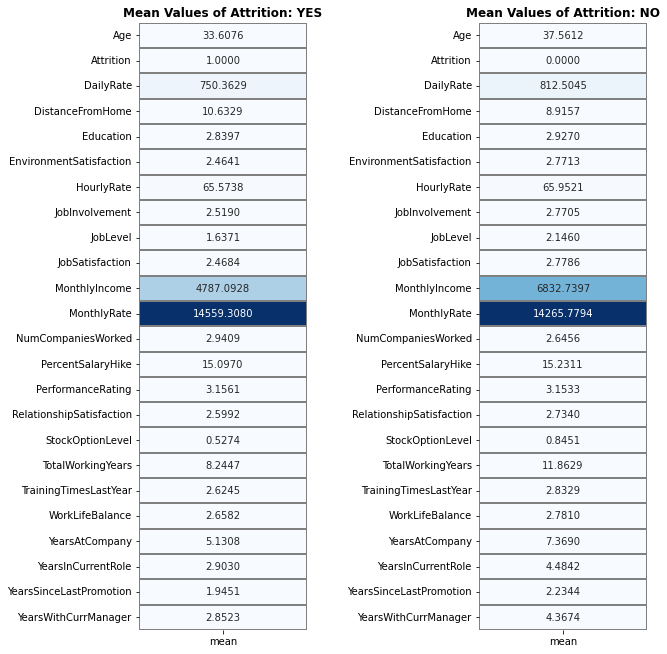

In [40]:
# futher exploration with heat map to compare the mean values focusing on the previous observed top 5 variables
# statistical distribution of mean values of attrition rates

attrition_yes = employeeData[employeeData['Attrition'].astype('str') == '1'].describe().T
attrition_no = employeeData[employeeData['Attrition'].astype('str') == '0'].describe().T

fig = plt.subplots(figsize=(10,10))
#Attrition: YES
plt.subplot(1,2,1,)
sns.heatmap(attrition_yes[['mean']], annot = True, cmap = 'Blues', linewidths=0.2, linecolor = 'grey', cbar = False, fmt ='.4f')
plt.title('Mean Values of Attrition: YES', fontweight="bold")

#Attrition: NO
plt.subplot(1,2,2)
sns.heatmap(attrition_no[['mean']], annot = True, cmap = 'Blues', linewidths=0.2, linecolor = 'grey', cbar = False, fmt ='.4f')
plt.title('Mean Values of Attrition: NO', fontweight="bold")
plt.tight_layout(pad=4);

###### Observation:
From the heat map we can infer that:
- Mean age of employee leaving the company is lower than those staying with the company.
- The mean job level value is lower for attrited employees.
- Monthly Income is lower for the attrited employees.
- Attrited employees have not stayed long at the company, Total Working Years is low.
- Years Inn Current Role is lower for attrited employees as well.

Further exploring the features individually to determine the 3 main factors

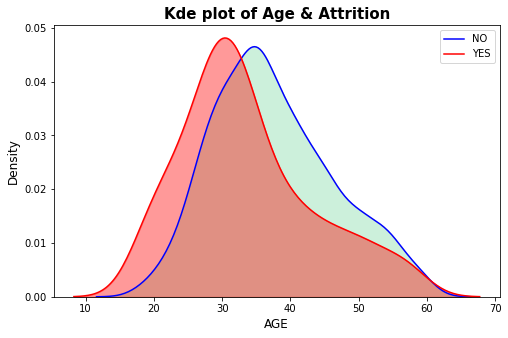

In [41]:
# kde plot of age vs attrition
plt.figure(figsize=(8, 5))

# plot
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '0', 'Age'], label = 'No', color = 'b')
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '1', 'Age'], label = 'Yes', color = 'red')

# generating shading from the axes lines
f = ax.lines[0]
s = ax.lines[1]

f_x = f.get_xydata()[:,0]
f_y = f.get_xydata()[:,1]
s_x = s.get_xydata()[:,0]
s_y = s.get_xydata()[:,1]
ax.fill_between(f_x, f_y, color = '#C0EDD2', alpha=0.8 )
ax.fill_between(s_x, s_y, color = 'red', alpha=0.4 )

plt.title('Kde plot of Age & Attrition', fontsize = 15, fontweight = "bold")
plt.xlabel('AGE', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.legend(['NO', 'YES']);


###### Observation:

* People who option for attrition belong to a younger group age.
* It's observed that young employees quit their job the most. So more concern should be given to young employees.  

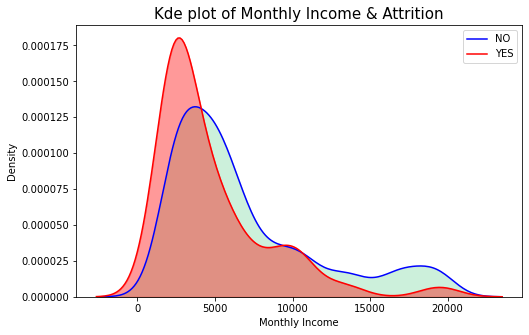

In [42]:
# kde plot of MonthlyIncome vs attrition
plt.figure(figsize=(8, 5))

#  color='#C0EDD2'
#  color='#FF0018',
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '0', 'MonthlyIncome'], label = 'No', color='b')
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '1', 'MonthlyIncome'], label = 'Yes', color='red')

# generating shading from the axes lines
f = ax.lines[0]
s = ax.lines[1]

f_x = f.get_xydata()[:,0]
f_y = f.get_xydata()[:,1]
s_x = s.get_xydata()[:,0]
s_y = s.get_xydata()[:,1]
ax.fill_between(f_x, f_y, color='#C0EDD2', alpha=0.8 )
ax.fill_between(s_x, s_y, color='red', alpha=0.4 )

plt.legend(['NO', 'YES'])
plt.xlabel('Monthly Income', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.title('Kde plot of Monthly Income & Attrition', fontsize=15);

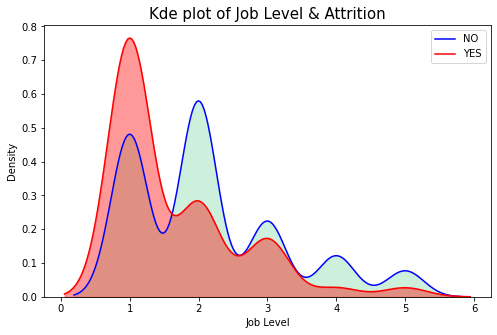

In [43]:
# kde plot of JobLevel vs attrition
plt.figure(figsize=(8, 5))

#  color='#C0EDD2'
#  color='#FF0018',
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '0', 'JobLevel'], label = 'No', color='b')
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '1', 'JobLevel'], label = 'Yes', color='red')

# generating shading from the axes lines
f = ax.lines[0]
s = ax.lines[1]

f_x = f.get_xydata()[:,0]
f_y = f.get_xydata()[:,1]
s_x = s.get_xydata()[:,0]
s_y = s.get_xydata()[:,1]
ax.fill_between(f_x, f_y, color='#C0EDD2', alpha=0.8 )
ax.fill_between(s_x, s_y, color='red', alpha=0.4 )

plt.legend(['NO', 'YES'])
plt.xlabel('Job Level', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.title('Kde plot of Job Level & Attrition', fontsize=15);

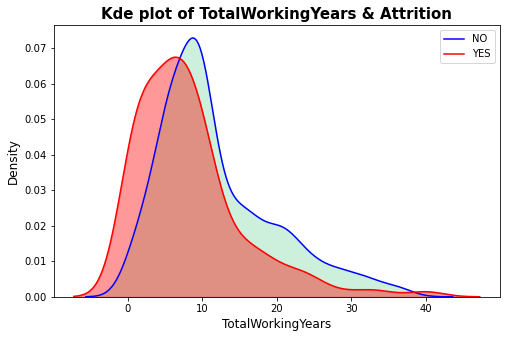

In [44]:
# kde plot of TotalWorkingYears vs attrition
plt.figure(figsize=(8, 5))

# plot
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '0', 'TotalWorkingYears'], label = 'No', color = 'b')
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '1', 'TotalWorkingYears'], label = 'Yes', color = 'red')

# generating shading from the axes lines
f = ax.lines[0]
s = ax.lines[1]

f_x = f.get_xydata()[:,0]
f_y = f.get_xydata()[:,1]
s_x = s.get_xydata()[:,0]
s_y = s.get_xydata()[:,1]
ax.fill_between(f_x, f_y, color = '#C0EDD2', alpha=0.8 )
ax.fill_between(s_x, s_y, color = 'red', alpha=0.4 )

plt.title('Kde plot of TotalWorkingYears & Attrition', fontsize = 15, fontweight = "bold")
plt.xlabel('TotalWorkingYears', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.legend(['NO', 'YES']);


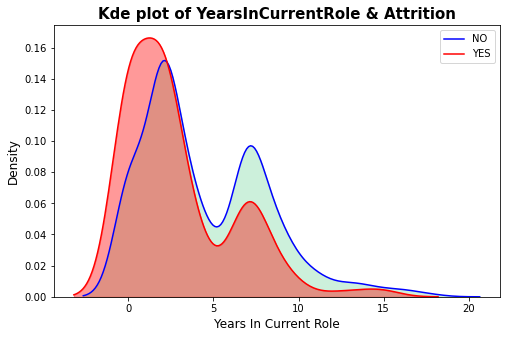

In [45]:
# kde plot of YearsInCurrentRole vs attrition
plt.figure(figsize=(8, 5))

# plot
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '0', 'YearsInCurrentRole'], label = 'No', color = 'b')
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '1', 'YearsInCurrentRole'], label = 'Yes', color = 'red')

# generating shading from the axes lines
f = ax.lines[0]
s = ax.lines[1]

f_x = f.get_xydata()[:,0]
f_y = f.get_xydata()[:,1]
s_x = s.get_xydata()[:,0]
s_y = s.get_xydata()[:,1]
ax.fill_between(f_x, f_y, color = '#C0EDD2', alpha=0.8 )
ax.fill_between(s_x, s_y, color = 'red', alpha=0.4 )

plt.title('Kde plot of YearsInCurrentRole & Attrition', fontsize = 15, fontweight = "bold")
plt.xlabel('Years In Current Role', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.legend(['NO', 'YES']);


###  The 3 factors behind employee attrition are

Job level, Monthly Income, Years In Current Role. 

* Employees with low job level optioned for attrition the most.
* Attrition is more clustered around the low monthly earners who have only been working for a few years at IBM.

### Question 2 : What is the relationship between education and monthly income?

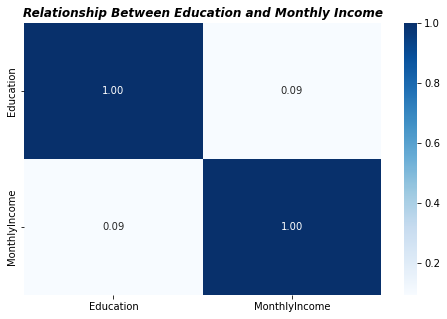

In [46]:
# Heatmap showing the relationship between education and monthly income
plt.figure(figsize=(8, 5))

sns.heatmap(data=employeeData[['Education', 'MonthlyIncome']].corr(), fmt='.2f', annot=True, cmap='Blues')
# plt.xticks(rotation=90)
plt.title('Relationship Between Education and Monthly Income', fontsize=12, fontweight="bold", fontstyle="oblique");

###### Observation:

Correlation rate of 0.09 means that there's a weak positive relationship between Education and Monthly Income of Employees.

### Question 3 : What is the effect of age on attrition?

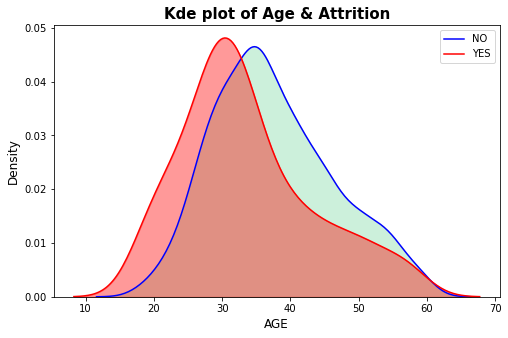

In [47]:
# kde plot of age vs attrition
plt.figure(figsize=(8, 5))

# plot
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '0', 'Age'], label = 'No', color = 'b')
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '1', 'Age'], label = 'Yes', color = 'red')

# generating shading from the axes lines
f = ax.lines[0]
s = ax.lines[1]

f_x = f.get_xydata()[:,0]
f_y = f.get_xydata()[:,1]
s_x = s.get_xydata()[:,0]
s_y = s.get_xydata()[:,1]
ax.fill_between(f_x, f_y, color = '#C0EDD2', alpha=0.8 )
ax.fill_between(s_x, s_y, color = 'red', alpha=0.4 )

plt.title('Kde plot of Age & Attrition', fontsize = 15, fontweight = "bold")
plt.xlabel('AGE', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.legend(['NO', 'YES']);



###### Observation:

* People who option for attrition belong to a younger group age.
* It's observed that young employees quit their job the most. So more concern should be given to young employees.  

### Question 4 : Is income the main factor in employee attrition?

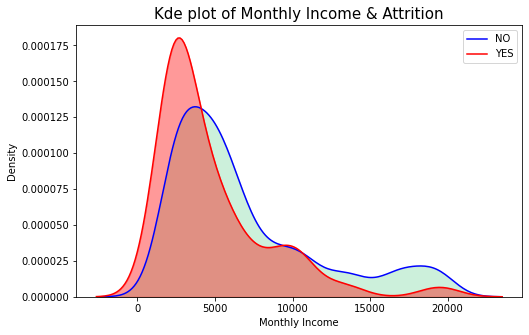

In [48]:
# kde plot of MonthlyIncome vs attrition
plt.figure(figsize=(8, 5))

#  color='#C0EDD2'
#  color='#FF0018',
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '0', 'MonthlyIncome'], label = 'No', color='b')
ax = sns.kdeplot(employeeData.loc[employeeData['Attrition'].astype('str') == '1', 'MonthlyIncome'], label = 'Yes', color='red')

# generating shading from the axes lines
f = ax.lines[0]
s = ax.lines[1]

f_x = f.get_xydata()[:,0]
f_y = f.get_xydata()[:,1]
s_x = s.get_xydata()[:,0]
s_y = s.get_xydata()[:,1]
ax.fill_between(f_x, f_y, color='#C0EDD2', alpha=0.8 )
ax.fill_between(s_x, s_y, color='red', alpha=0.4 )

plt.legend(['NO', 'YES'])
plt.xlabel('Monthly Income', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.title('Kde plot of Monthly Income & Attrition', fontsize=15);

##### Observation: 

* Monthly income range of attrited employees is very small. So therefore, we can conclude that income is a main factor in employee attrition.


### Question 5 : How does work-life balance impact the overall attrition rate?

In [49]:
# converting attrition to a categorical variabble so we can plot a bar chart
employeeData['Attrition'].replace([1, 0], ['Yes', 'No'], inplace=True)

# group by
grp_wlb = employeeData.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).to_frame().unstack()

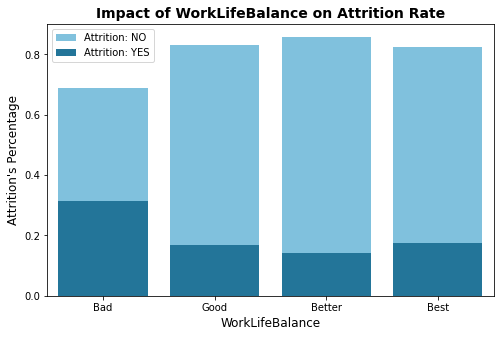

In [50]:
# Checking if WorkLifeBalance have any impact on Attrition Rate
fig = plt.figure(figsize = (8, 5))

# plot  
ax = sns.barplot(x = grp_wlb.index, y = ('Attrition', 'No'), data = grp_wlb, color = '#71c7ec', label = 'Attrition: NO')
sns.barplot(x = grp_wlb.index, y = ('Attrition', 'Yes'), data = grp_wlb, color = '#107dac', label = 'Attrition: YES')
ax.set_xticklabels(['Bad', 'Good', 'Better', 'Best'])
plt.title('Impact of WorkLifeBalance on Attrition Rate', fontweight = "bold", fontsize = 14)
plt.xlabel('WorkLifeBalance', fontsize = 12)
plt.ylabel('Attrition\'s Percentage', fontsize = 12)
plt.legend();


##### Observation: 
* Attrition rate is higher among employees with Bad Work-Life balance
* Surprising, employees with the Best Work-Life balance have the second highest attrition rate
* Employees with Better Work-Life have the least attrition rate

## 4. Conclusion
* The exploration of the IBM Attrition Data is to depict the factors that are responsible for employee attrition, which are Job level, Monthly Income, Years In Current Role. It was identified that these three variables are the most negatively weakly correlated with attrition.
* There's a weak positive relationship between Education and Monthly Income of Employees.
* It's observed that young employees quit their job the most. 
* Attrition rate is higher among employees with Bad Work-Life balance
* Income is a main factor in employee attrition.
